In [45]:
import librosa
import pandas as pd
#import tarfile
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
from scipy import stats
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data and Unzip 

In [ ]:
tar = tarfile.open('UrbanSound8K.tar.gz', "r:gz")
tar.extractall()
tar.close()

# Chose a Random File from Each Type

In [3]:
meta = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [4]:
meta.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
grouped = meta.loc[meta['fold'] == 1]
grouped = grouped.groupby(['class'])
file_names = grouped.apply(lambda x: x.sample(n=1))

In [6]:
file_names

,,slice_file_name,fsID,start,end,salience,fold,classID,class
class,,,,,,,,,
air_conditioner,1400,134717-0-0-27.wav,134717,13.500000,17.500000,1,1,0,air_conditioner
car_horn,3007,162540-1-1-0.wav,162540,5.888426,6.202331,1,1,1,car_horn
children_playing,3755,176714-2-0-23.wav,176714,11.500000,15.500000,1,1,2,children_playing
dog_bark,5278,203440-3-0-5.wav,203440,26.009202,30.009202,2,1,3,dog_bark
drilling,3152,165642-4-0-0.wav,165642,0.000000,4.000000,1,1,4,drilling
engine_idling,742,113205-5-1-3.wav,113205,28.540000,32.540000,1,1,5,engine_idling
gun_shot,6511,46656-6-4-0.wav,46656,9.118156,10.626591,1,1,6,gun_shot
jackhammer,4319,180937-7-0-5.wav,180937,173.772327,177.772327,1,1,7,jackhammer
siren,6378,40722-8-0-1.wav,40722,0.500000,4.500000,2,1,8,siren


In [8]:
def make_plots(fname, label): 
    path = 'UrbanSound8K/audio/fold1/' + fname
    try: 
        y, sr = librosa.load(path)
        print label
        plt.figure()
        plt.subplot(3, 1, 1)
        librosa.display.waveplot(y, sr=sr)
        plt.title('Monophonic Waves')
        
        plt.figure(figsize=(12, 8))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        plt.subplot(4, 2, 1)
        librosa.display.specshow(D, y_axis='linear')
        plt.title('Linear-frequency power spectrogram')
        
        plt.show()
        print '\n\n'
    except: 
        pass

air_conditioner


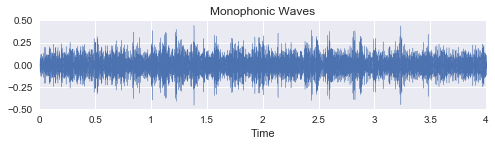

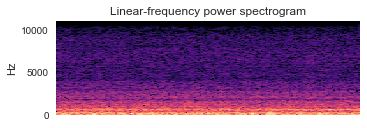




children_playing


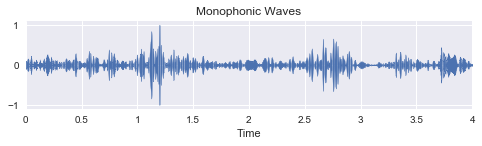

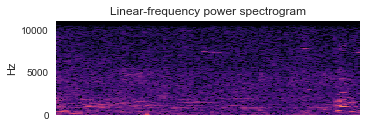




dog_bark


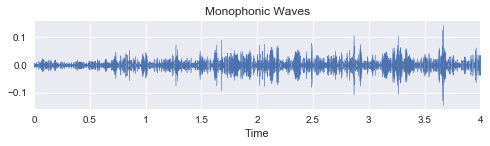

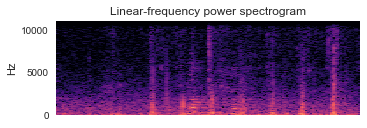




drilling


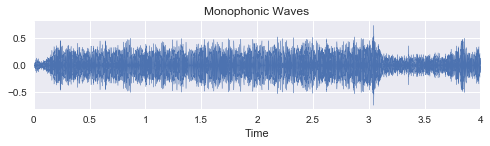

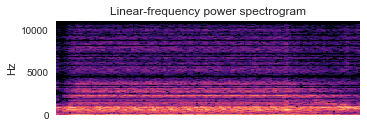




gun_shot


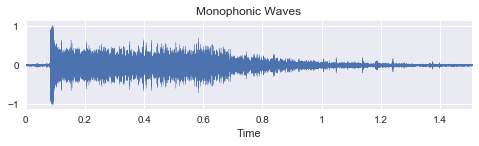

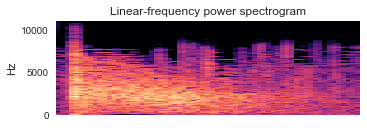




siren


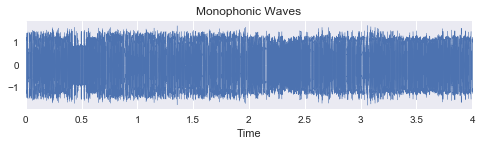

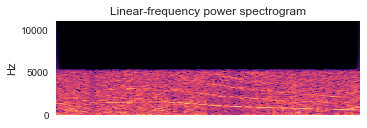




street_music


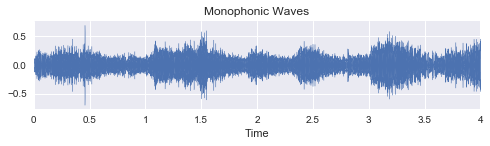

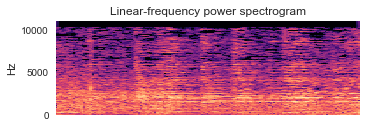

In [58]:
for i, r in file_names.iterrows(): 
    make_plots(r['slice_file_name'], r['class'])

In [9]:
def mfcc(fname,fold): 
    path = 'UrbanSound8K/audio/' + fold +'/' + fname
    y, sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    mfcc_delta = librosa.feature.delta(mfcc)

    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    #print len(mfcc_delta2[1])
    combined = np.concatenate((mfcc_delta, mfcc_delta2), axis=0)
    x = stats.zscore(combined, axis=1, ddof=1)
    x = x.flatten()
    return x

In [35]:
grouped = meta.loc[meta['fold'] <= 2]
grouped = grouped.groupby(['class'])
file_names_train = grouped.apply(lambda x: x.sample(frac=0.80))

In [36]:
features=[]
labels=[]
for i, r in file_names_train.iterrows(): 
    try: 
        x = mfcc(r['slice_file_name'], 'train')
        features.append(x)
        labels.append(int(r['classID']))
    except: 
        pass 

C:\Users\ashle\Anaconda2\lib\site-packages\scipy\stats\stats.py:2246: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [42]:
for i in range(len(features)): 
    if len(features[i])!=6920: 
        del features[i]
        del labels[i]

In [43]:

svc = SVC()
svc.fit(features, labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
from sklearn.svm import LinearSVC

In [48]:
lsvc = LinearSVC(random_state=0, tol=1e-5)
lsvc(features,labels)

TypeError: 'LinearSVC' object is not callable

In [49]:
grouped = meta.loc[meta['fold'] ==3]
grouped = grouped.groupby(['class'])
file_names_test = grouped.apply(lambda x: x.sample(frac=0.25))

In [50]:
features=[]
labels=[]
for i, r in file_names_test.iterrows(): 
    try: 
        x = mfcc(r['slice_file_name'],'test')
        features.append(x)
        labels.append(int(r['classID']))
    except: 
        pass 

In [55]:
for i in range(len(features)): 
    if len(features[i])!=6920: 
        del features[i]
        del labels[i]

In [56]:
predict_csv=svc.predict(features)

In [ ]:
predict_lcsv=lsvc.predict(features)

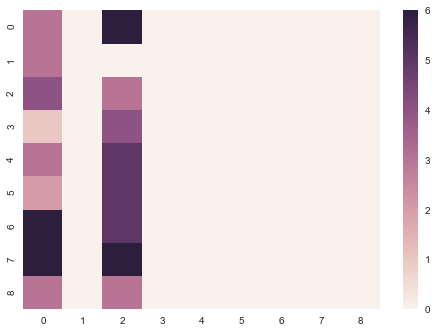

In [57]:

cm_svc=confusion_matrix(labels, predict_csv)
sns.heatmap(cm)
plt.show()

In [ ]:
cm_svc=confusion_matrix(labels, predict_lcsv)
sns.heatmap(cm)
plt.show()